In [1]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('spambase.data').as_matrix()

C:\Users\Agniesia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [3]:
np.random.shuffle(data)

In [4]:
#48 continuous real [0,100] attributes of type word_freq_WORD 
X = data[:,:48]
#1 nominal {0,1} class attribute of type spam
#| = denotes whether the e-mail was considered spam (1) or not (0), 
#| i.e. unsolicited commercial e-mail.  
Y = data[:,-1]

In [5]:
#datasplit for training and test
X_train = X[:-1380,]
Y_train = Y[:-1380,]
X_test = X[-1380:,]
Y_test = Y[-1380:,]


In [6]:
model = LinearSVC()
Y_pred = model.fit(X_train, Y_train).predict(X_test)

Confusion matrix, without normalization
[[784  54]
 [ 78 464]]
Normalized confusion matrix
[[0.94 0.06]
 [0.14 0.86]]


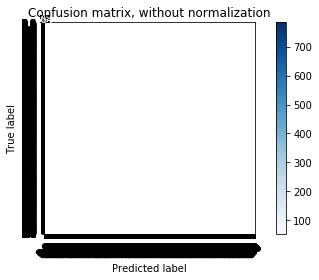

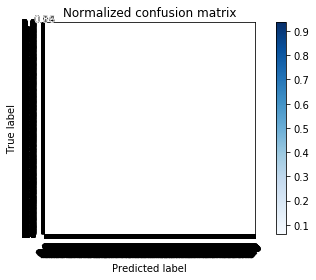

In [7]:
def plot_confusion_matrix(cm, classes=Y,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= Y,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= Y, normalize=True,
                      title='Normalized confusion matrix')

plt.show()